# first of we load files and import libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

V = pd.read_csv('Arkusz_31_2.csv', header=None)  # Load the voltage data
V2 = pd.read_csv('Arkusz_31_4.csv', header=None)  # Load the voltage data
V = V.iloc[::-1].reset_index(drop=True)
V2 = V2.iloc[::-1].reset_index(drop=True)

# Najpierw zobaczymy jak wygląda pole elektrostatyczne wewnątrz kondensatora płaskiego

(-1.0, 5.5)

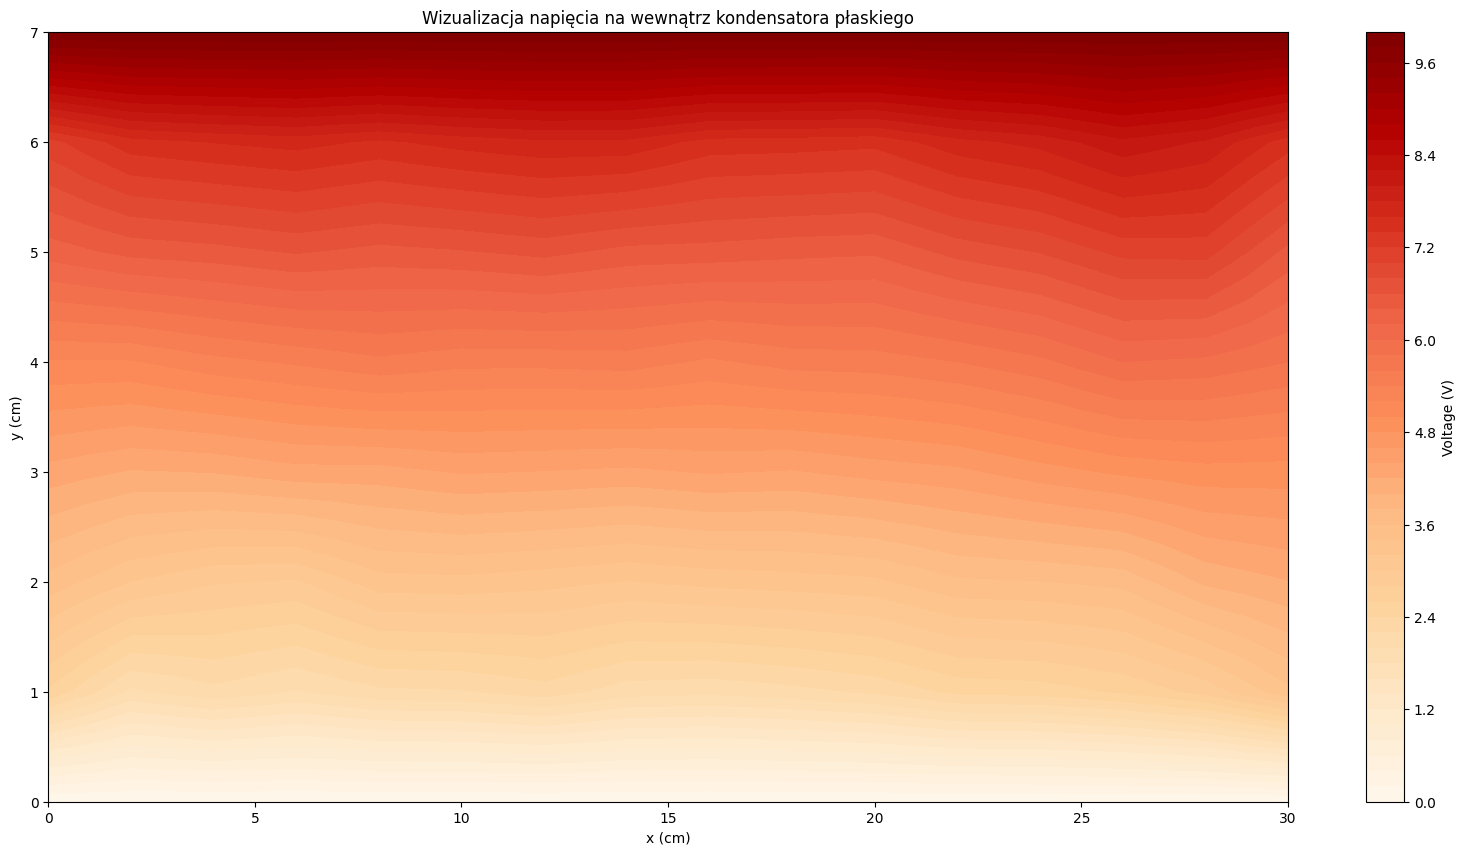

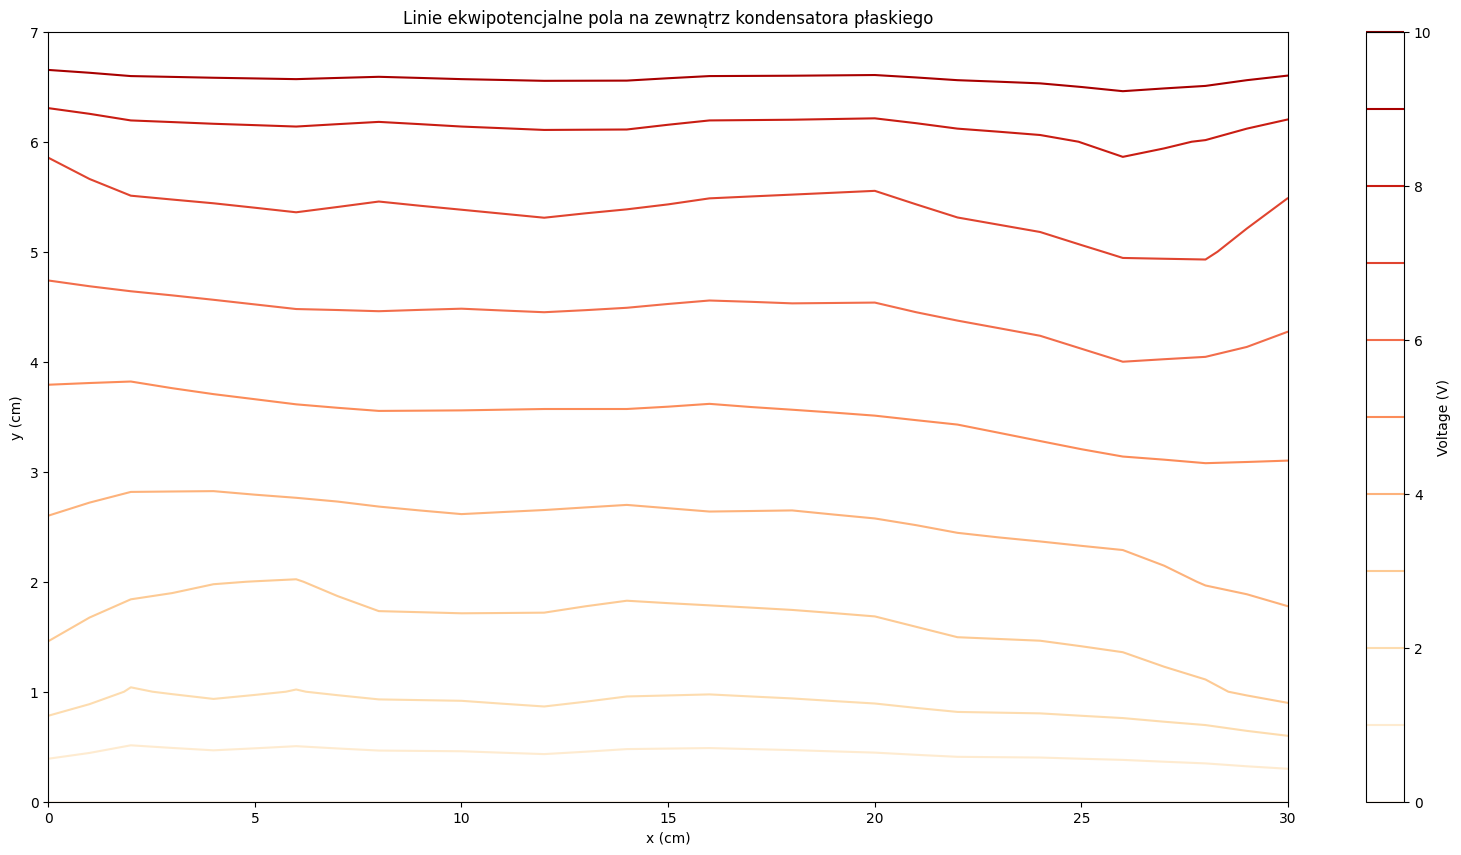

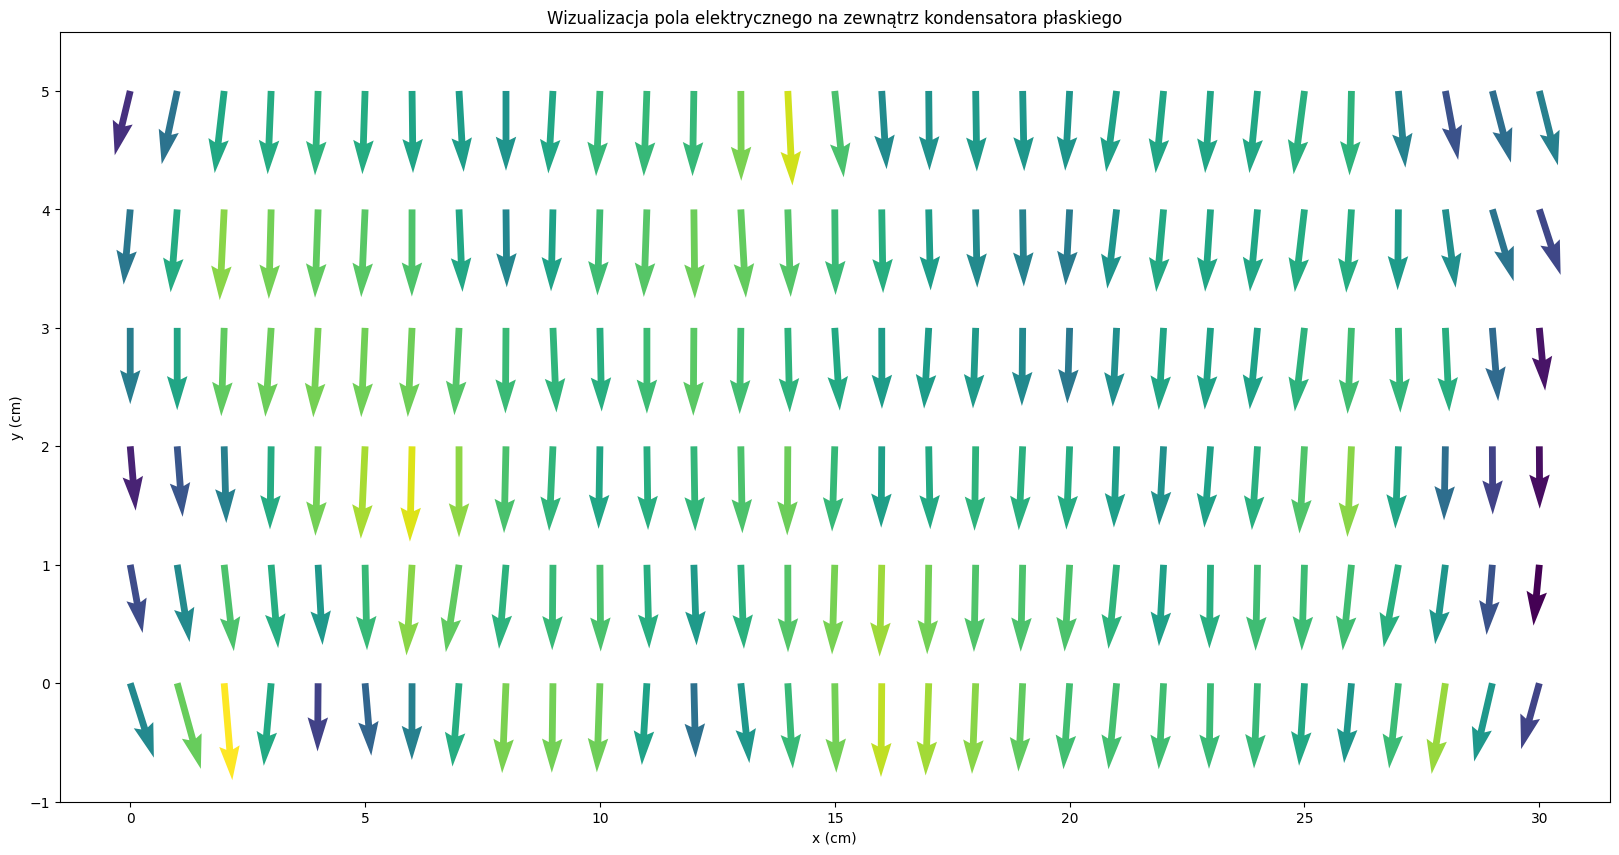

In [6]:
grid_size_x = V.shape[1]
grid_size_y = V.shape[0]
x = np.arange(grid_size_x)  # X-coordinates
y = np.arange(grid_size_y)  # Y-coordinates
X, Y = np.meshgrid(x, y)  # Create a grid of coordinates
new_V = V.iloc[1:-1]
new_X, new_Y = np.meshgrid(np.arange(new_V.shape[1]), np.arange(new_V.shape[0]))

# Step 4: Plot the electric field vectors using quiver
plt.figure(figsize=(20, 10))
plt.contourf(X, Y, V, levels=50, cmap='OrRd')
plt.colorbar(label='Voltage (V)')
plt.title('Wizualizacja napięcia na wewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

plt.figure(figsize=(20, 10))
plt.contour(X, Y, V, levels=9, cmap='OrRd')  # Plot electric field vectors
plt.title('Linie ekwipotencjalne pola na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.colorbar(label='Voltage (V)')
plt.ylabel('y (cm)')
Ey, Ex = np.gradient(-new_V)
magnitude = np.sqrt(Ex ** 2 + Ey ** 2)
plt.figure(figsize=(20, 10))
plt.title('Wizualizacja pola elektrycznego na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.quiver(new_X, new_Y, Ex, Ey, magnitude, color='green', scale=20)
plt.ylim(-1, 5.5)


# Teraz zobaczymy jak wygląda pole elektrostatyczne na zewnątrz kondensatora płaskiego

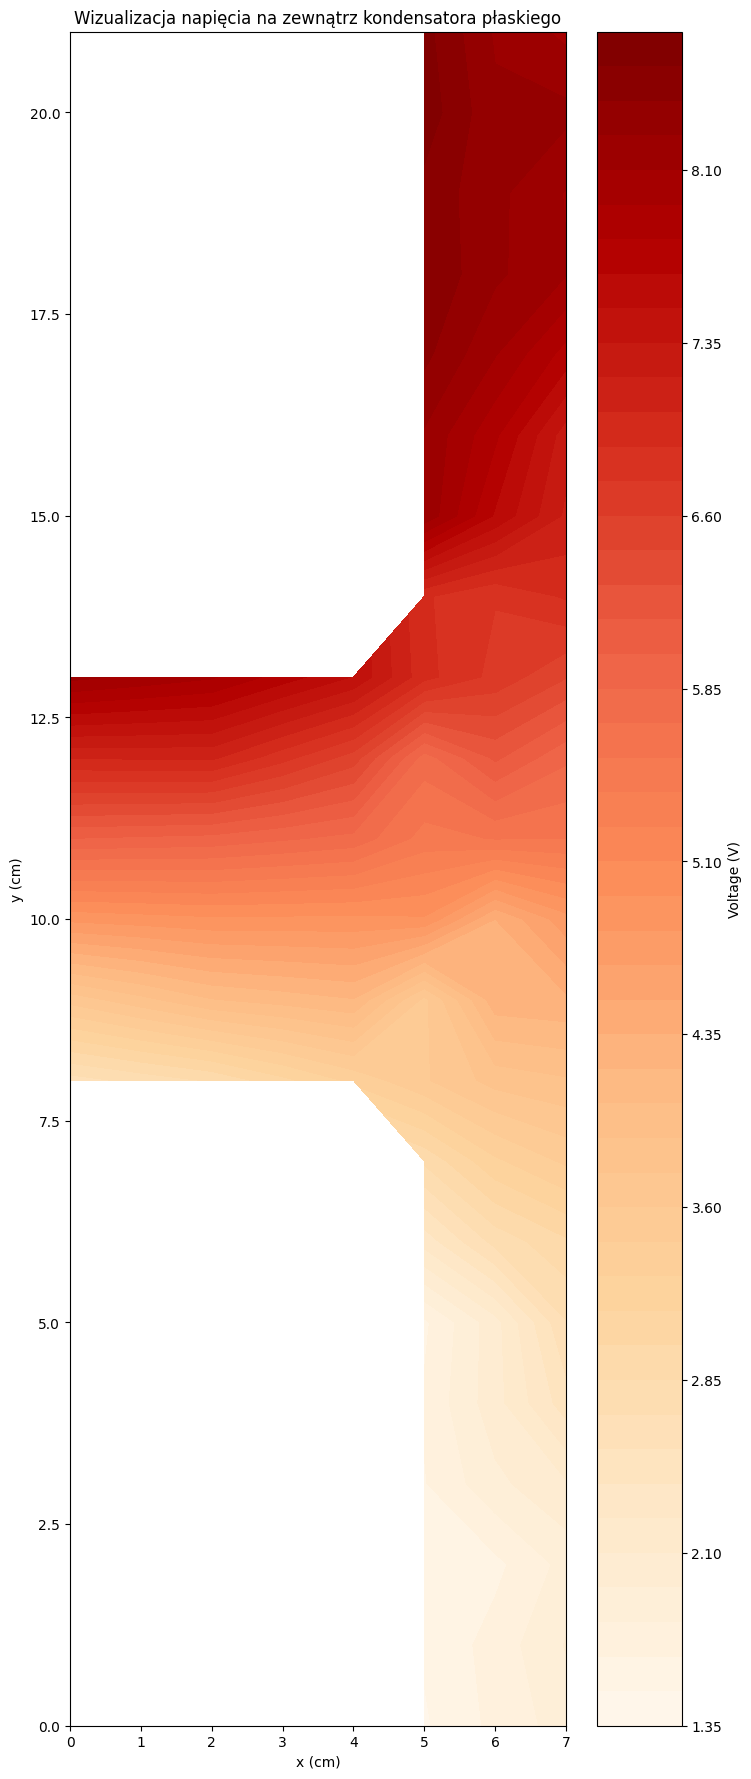

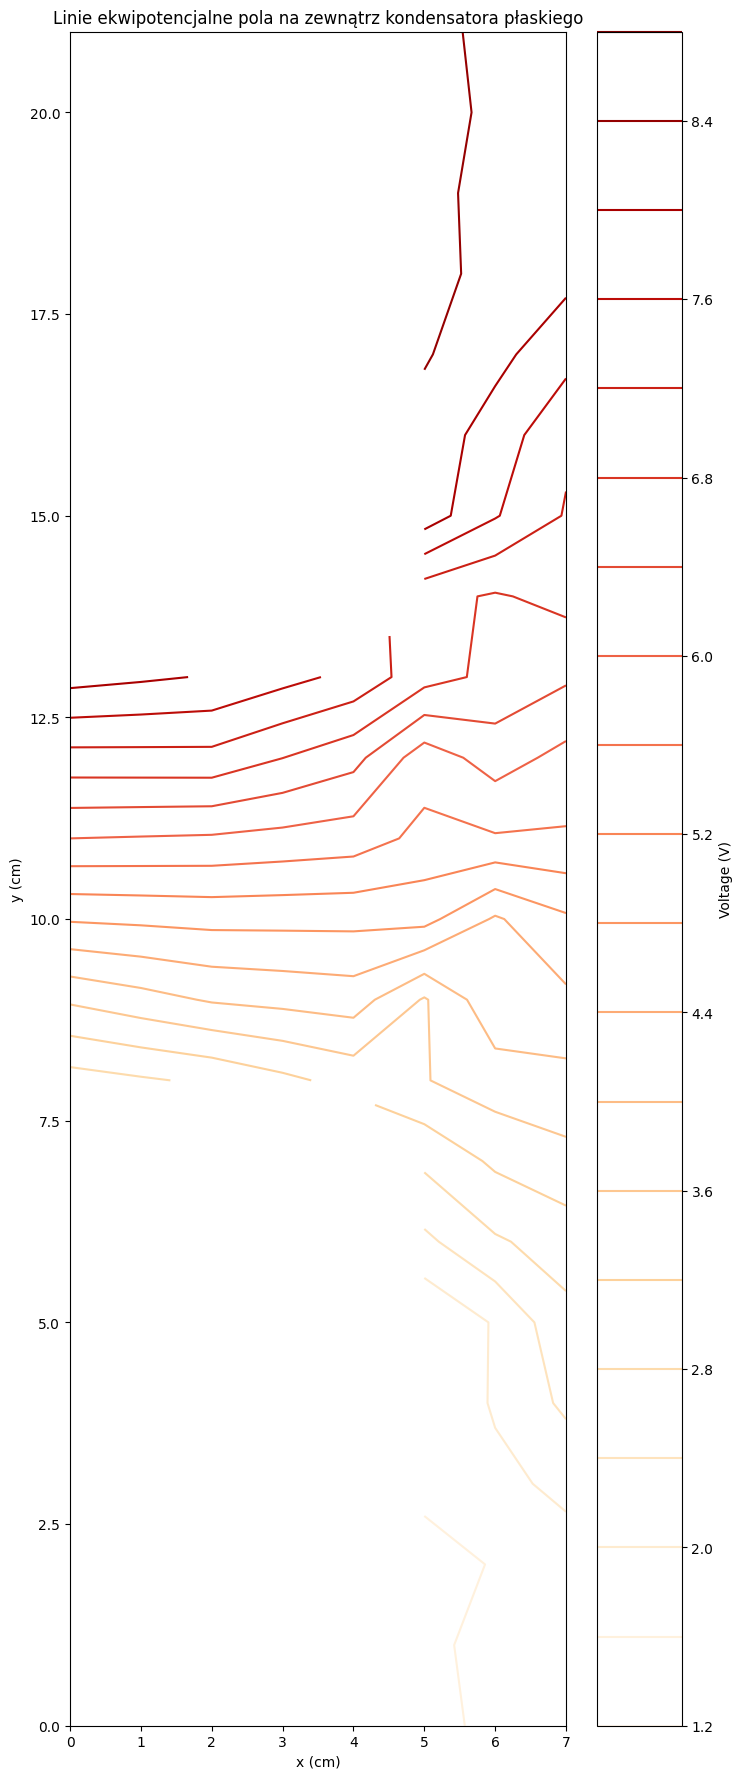

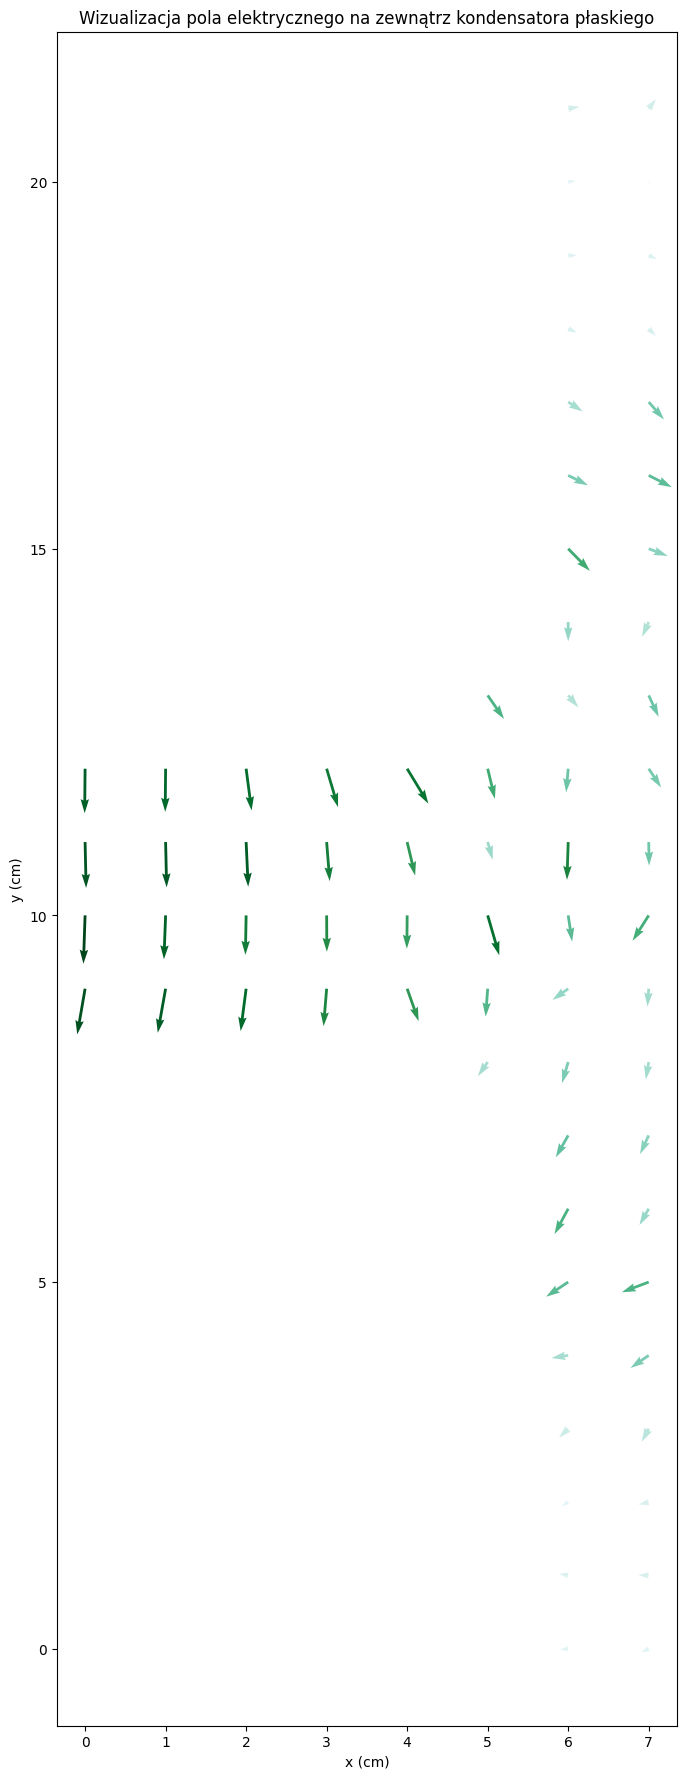

In [7]:
grid_size_x2 = V2.shape[1]
grid_size_y2 = V2.shape[0]
x2 = np.arange(grid_size_x2)  # X-coordinates
y2 = np.arange(grid_size_y2)  # Y-coordinates
X2, Y2 = np.meshgrid(x2, y2)  # Create a grid of coordinates
Ey2, Ex2 = np.gradient(-V2)

plt.figure(figsize=(8, 22))
plt.contourf(X2, Y2, V2, levels=50, cmap='OrRd')
plt.colorbar(label='Voltage (V)')
plt.title('Wizualizacja napięcia na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

plt.figure(figsize=(8, 22))
plt.contour(X2, Y2, V2, levels=20, cmap='OrRd')  # Plot electric field vectors
plt.title('Linie ekwipotencjalne pola na zewnątrz kondensatora płaskiego')
plt.colorbar(label='Voltage (V)')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')

magnitude = np.sqrt(Ex2 ** 2 + Ey2 ** 2)
plt.figure(figsize=(8, 22))
plt.title('Wizualizacja pola elektrycznego na zewnątrz kondensatora płaskiego')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.quiver(X2, Y2, Ex2, Ey2, magnitude, cmap='BuGn', scale=15)
